# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [ ]:
data_path = '../data/heart.csv'
df = pd.read_csv(data_path)

# Functions

In [3]:
def split_numeric_categorical_cols(df):
    """
    Splits the DataFrame columns into numerical and categorical lists.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to process.
        
    Returns:
        tuple: A tuple of two lists (numerical_cols, categorical_cols)
    """
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
    return numerical_cols, categorical_cols

In [4]:
def plot_histograms_grid(df, columns=None, max_cols=3, figsize=(15, 5)):
    """
    Plots multiple histograms in a grid layout.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame
        columns (list): List of column names to plot. If None, plots all numeric columns.
        max_cols (int): Number of plots per row (default: 3)
        figsize (tuple): Size of each subplot (width per plot, height total)
    """
    # If columns is None or empty, take all numeric columns from the dataframe
    if columns is None or len(columns) == 0:
        columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]

    n = len(columns)
    if n == 0:
        print("No numeric columns to plot.")
        return

    rows = math.ceil(n / max_cols)
    fig, axes = plt.subplots(rows, max_cols, figsize=(figsize[0], figsize[1]*rows))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        data = df[col].dropna()
        q25, q75 = np.percentile(data, [25, 75])
        iqr = q75 - q25
        bin_width = 2 * iqr / (len(data) ** (1/3))
        bins = int((data.max() - data.min()) / bin_width) if bin_width > 0 else 10

        axes[i].hist(data, bins=bins, edgecolor='black')
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    
    # Turn off empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [5]:
def binary_encode_with_map(df):
    """
    Replaces binary values in-place using a predefined map.
    Only columns with exactly two unique values are considered.
    """

    # Predefined value mapping (expand as needed)
    binary_value_map = {
        "N": 1, "Y": 0,
        "M": 1, "F": 0,
    }

    binary_cols = []

    for col in df.columns:
        unique_vals = df[col].dropna().unique()

        if len(unique_vals) == 2:
            lower_vals = [str(v).strip().capitalize() for v in unique_vals]
            # Check if both values are in the predefined map
            if all(v in binary_value_map for v in lower_vals):
                binary_cols.append(col)
                df[col] = df[col].map(lambda x: binary_value_map.get(str(x).strip().capitalize(), x))

    print("Binary columns encoded:", binary_cols)

In [6]:


def plot_correlation_heatmap(df):
    """
    Generates a correlation heatmap for all numerical columns in the DataFrame.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame containing numerical columns.
    """
    # Obliczamy macierz korelacji dla numerycznych kolumn
    corr_matrix = df.corr()

    # Tworzymy wykres
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title("Correlation Heatmap")
    plt.show()


In [7]:
def frequency_encoding(df, column):
    freq = df[column].value_counts() / len(df)
    df[column] = df[column].map(freq)

# Columns

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

 - Age: age of the patient [years]
 - Sex: sex of the patient [M: Male, F: Female]
 - ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
 - RestingBP: resting blood pressure [mm Hg]
 - Cholesterol: serum cholesterol [mm/dl]
 - FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
 - RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 
 - LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
 - MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
 - ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
 - Oldpeak: oldpeak = ST [Numeric value measured in depression]
 - ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
 - HeartDisease: output class [1: heart disease, 0: Normal]

# Descriptive Statistics

In [8]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB



# Initial Data Overview

## Dataset Summary

- **Number of rows**: 918  
- **Number of columns**: 12  
- **Missing values**: None — all columns are fully populated  

## Data Types

| Data Type | Column Count | Example Columns                             |
|-----------|---------------|---------------------------------------------|
| int64     | 6             | Age, RestingBP, Cholesterol, FastingBS, MaxHR, HeartDisease |
| float64   | 1             | Oldpeak                                     |
| object    | 5             | Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope |

## Observations

- **No missing data** – every column is fully populated.
- **Numeric columns**: This dataset contains int64 and float64 columns, which may require further exploration for distribution, outliers, and potential correlations.
  - int64 columns: `Age`, `RestingBP`, `Cholesterol`, `FastingBS`, `MaxHR`, `HeartDisease`
  - float64 column: `Oldpeak`
  
- **Categorical columns**: Most of the features in this dataset are categorical (object type), which may require encoding (label encoding, one-hot encoding) depending on the modeling goal.
  - object columns: `Sex`, `ChestPainType`, `RestingECG`, `ExerciseAngina`, `ST_Slope`

- The `HeartDisease` column is likely the target variable, binary (0 or 1), indicating the presence or absence of heart disease.


In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000



## Observations

- **Age**: Distribution spans from 29 to 77, with a median of 54.
- **ChestPainType**: Categories like ATA, NAP, and ASY; needs encoding.
- **RestingBP**: Wide range, possible outliers.
- **Cholesterol**: Likely skewed towards higher values.
- **MaxHR**: Wide spread, check for outliers.
- **HeartDisease**: Binary target variable, 0 or 1.

In [11]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64


## Observations

- **Age** has 50 unique values, indicating it's a continuous feature.
- Several numerical columns (e.g., `RestingBP`, `MaxHR`, `Oldpeak`) have high cardinality, suggesting a wide range of values.
- Binary columns: `Sex`, `FastingBS`, `ExerciseAngina`, and `HeartDisease` each have 2 unique values, indicating they are categorical/binary.
- Categorical columns like `ChestPainType`, `RestingECG`, and `ST_Slope` have manageable cardinality and are suitable for encoding.


# Feature Type Separation

In [12]:
numerical_cols, categorical_cols = split_numeric_categorical_cols(df=df)
print("Numerical columns:")
print(numerical_cols)

print("\nCategorical columns:")
print(categorical_cols)

Numerical columns:
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

Categorical columns:
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


# Numerical Columns Distribution Analysis

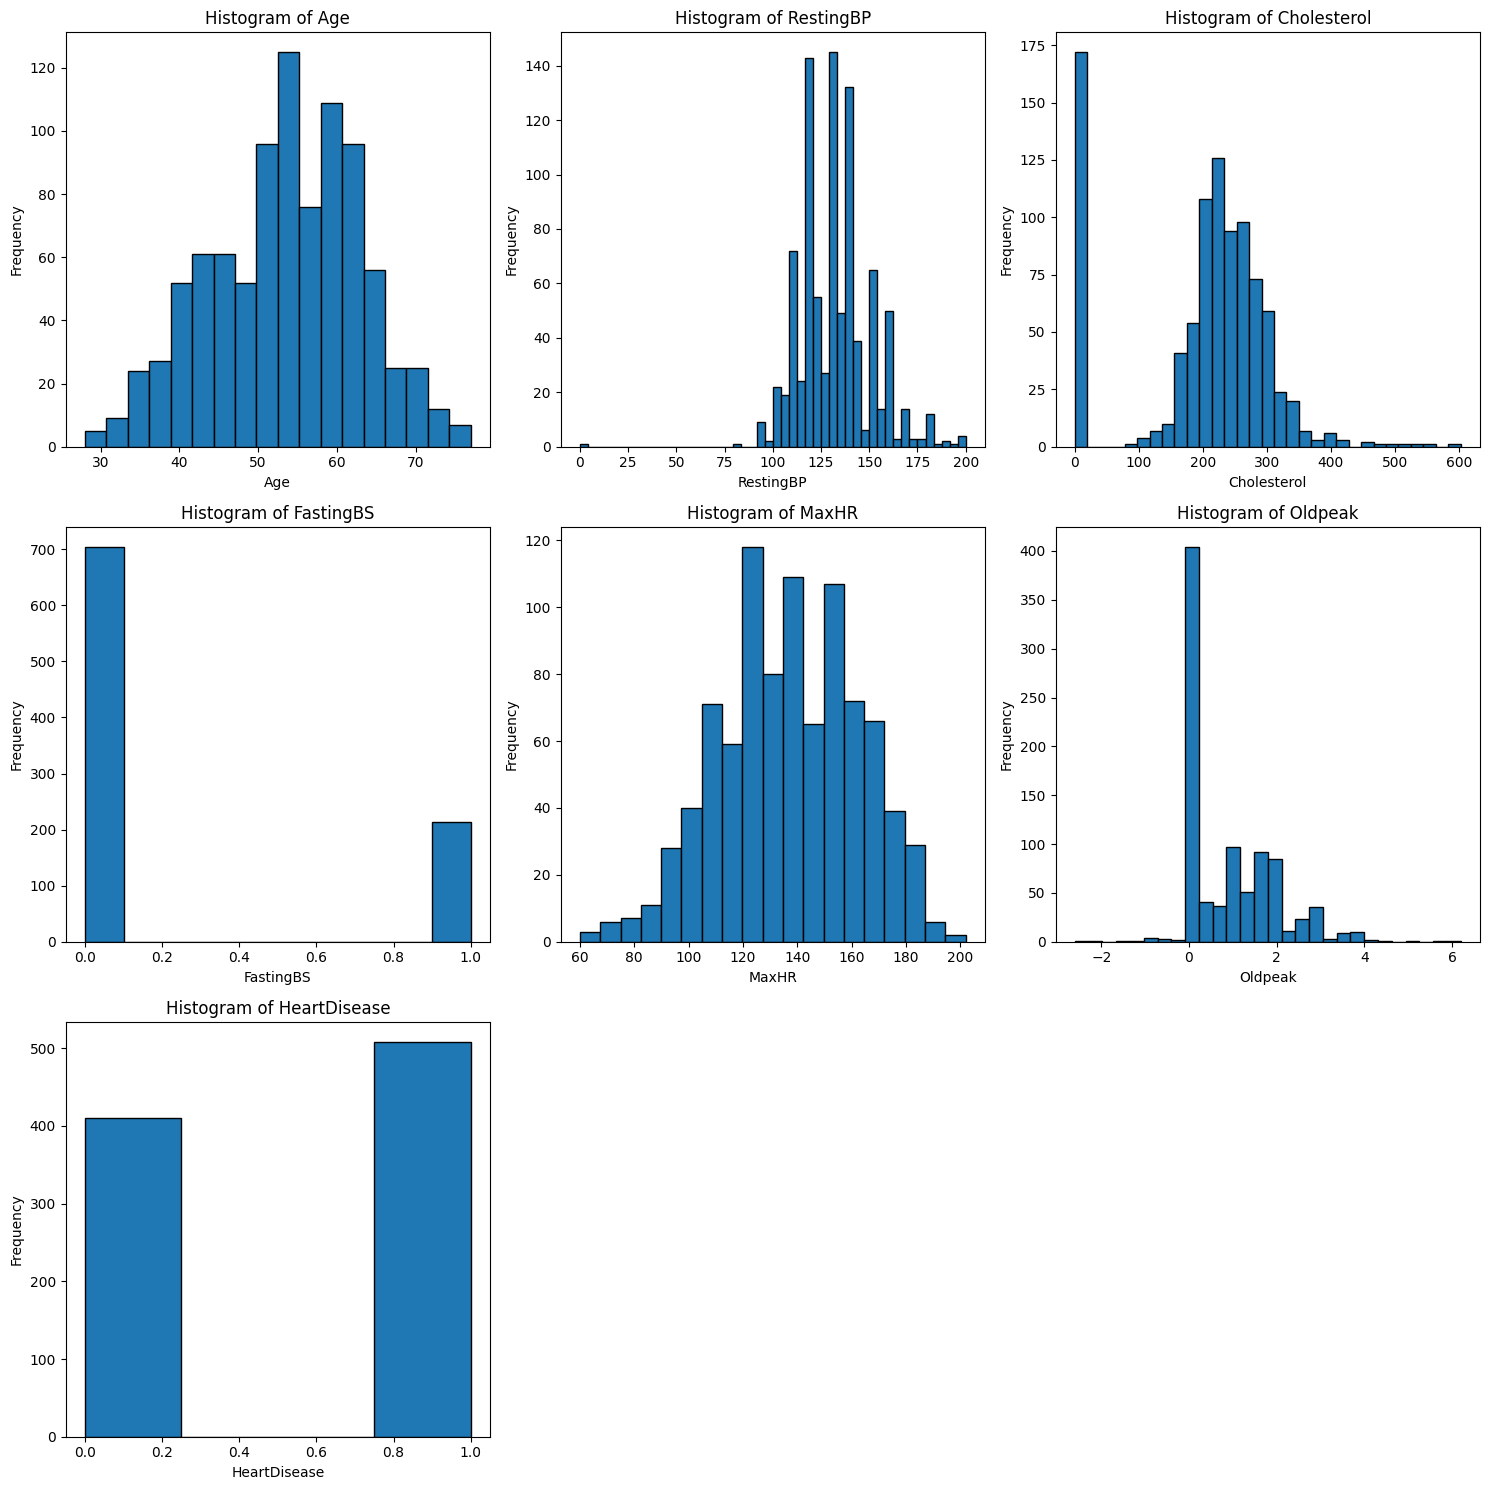

In [13]:
plot_histograms_grid(df=df, columns=numerical_cols)


## Distribution Analysis

1. **Age**: The distribution is roughly normal, with most values clustered around 50. There is a slight drop-off at the lower and upper ends, but the distribution is fairly balanced.

2. **RestingBP (Resting Blood Pressure)**: The distribution is skewed with a concentration around 120. There are some values spreading out towards higher blood pressures, but the majority remain in the mid-range.

3. **Cholesterol**: This feature is right-skewed with the bulk of the values concentrated below 300. A few higher values suggest some outliers or extreme cases.

4. **FastingBS (Fasting Blood Sugar)**: Binary distribution, with most of the values being 0 (normal fasting blood sugar), and only a small number of instances showing high blood sugar (1).

5. **MaxHR (Maximum Heart Rate)**: The distribution is fairly normal, with a peak around 130. Some spread to both lower and higher heart rates, but no significant outliers.

6. **Oldpeak**: Skewed distribution with most values concentrated around 0. There are a few extreme values, suggesting rare occurrences of abnormal oldpeak values.

7. **HeartDisease**: A binary distribution, with roughly equal instances of 0 (no heart disease) and 1 (presence of heart disease).



# Encoding Strategy for Categorical Columns

- **Sex**:  
  - Binary feature with values `M` (Male) and `F` (Female).  
  - **Encoding Method**: **Label Encoding** (map `M` to 0 and `F` to 1).  
  - This is a simple binary feature, and label encoding is appropriate.

- **ExerciseAngina**:  
  - Binary feature with values `Y` (Yes) and `N` (No).  
  - **Encoding Method**: **Label Encoding** (map `Y` to 1 and `N` to 0).  
  - Label encoding works here since it's a binary feature.

- **ChestPainType**:  
  - Multiclass feature with values `ATA`, `NAP`, `ASY`, and `TA`.  
  - **Encoding Method**: **Frequency Encoding**  
  - The feature has four categories, so frequency encoding will replace each category with its frequency in the dataset, capturing the distribution.

- **RestingECG**:  
  - Multiclass feature with values `Normal`, `ST`, and `LVH`.  
  - **Encoding Method**: **Frequency Encoding**  
  - The feature has three categories, so frequency encoding will capture the frequency of each ECG result in the dataset.

- **ST_Slope**:  
  - Multiclass feature with values `Up`, `Flat`, and `Down`.  
  - **Encoding Method**: **Frequency Encoding**  
  - With three categories, frequency encoding will assign each category a numeric value based on its occurrence in the dataset.

## Summary

- **Binary features** like `Sex` and `ExerciseAngina` will be encoded using **Label Encoding**.
- **Multiclass features** like `ChestPainType`, `RestingECG`, and `ST_Slope` will be encoded using **Frequency Encoding** to retain category distribution information without expanding dimensionality.


In [14]:
df_cat = df[categorical_cols].copy()
df_cat.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [15]:
df_cat.nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

In [16]:
binary_encode_with_map(df=df_cat)

Binary columns encoded: ['Sex', 'ExerciseAngina']


In [17]:
df_cat.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,ATA,Normal,1,Up
1,0,NAP,Normal,1,Flat
2,1,ATA,ST,1,Up
3,0,ASY,Normal,0,Flat
4,1,NAP,Normal,1,Up


In [18]:
# Get unique values for each column in the selected DataFrame
unique_values = df_cat[['ChestPainType', 'RestingECG', 'ST_Slope']].apply(lambda x: x.unique())

# Print the unique values for each column
print(unique_values)

ChestPainType    [ATA, NAP, ASY, TA]
RestingECG         [Normal, ST, LVH]
ST_Slope            [Up, Flat, Down]
dtype: object


In [19]:
df_cat.info(), df_cat.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sex             918 non-null    int64 
 1   ChestPainType   918 non-null    object
 2   RestingECG      918 non-null    object
 3   ExerciseAngina  918 non-null    int64 
 4   ST_Slope        918 non-null    object
dtypes: int64(2), object(3)
memory usage: 36.0+ KB


(None,
 Sex               2
 ChestPainType     4
 RestingECG        3
 ExerciseAngina    2
 ST_Slope          3
 dtype: int64)

In [20]:
frequency_encoding(df = df_cat, column='ChestPainType')
frequency_encoding(df = df_cat, column='RestingECG')
frequency_encoding(df = df_cat, column='ST_Slope')

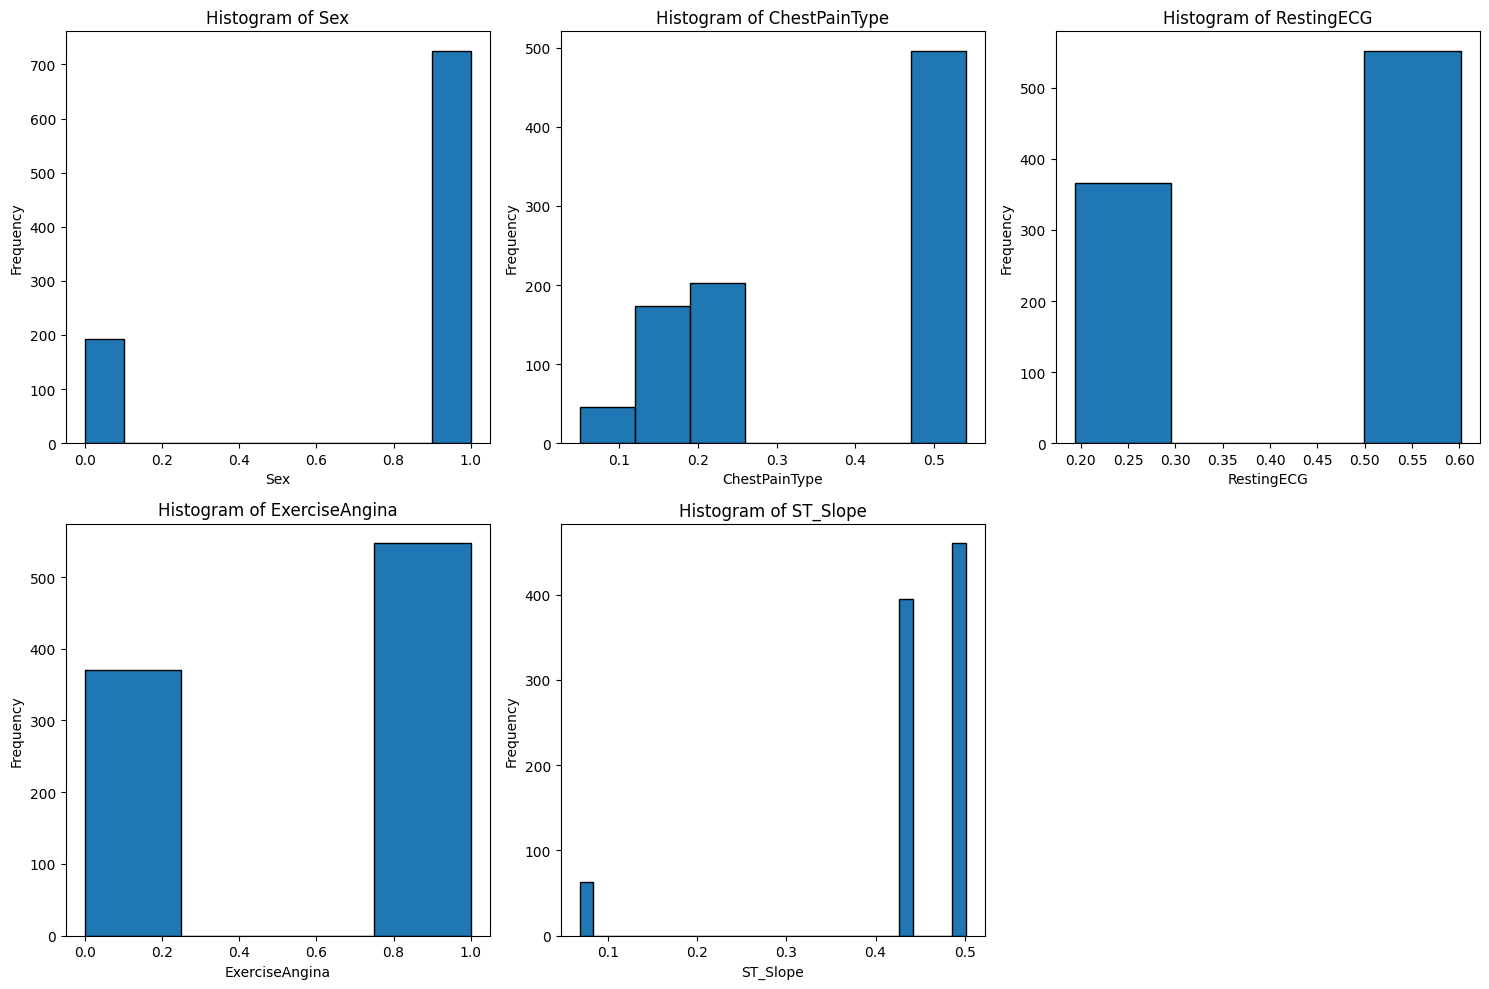

In [21]:
plot_histograms_grid(df=df_cat)


## Encoded Feature Histogram Analysis

### Sex
- Clear dominance of one value, indicating strong class imbalance (likely more males or females depending on the mapping).
- **Conclusion**: This feature is imbalanced and may require class weighting during model training.

### ChestPainType
- One category clearly dominates, while others are significantly less frequent.
- **Conclusion**: Realistic distribution. Frequency encoding captures this well, but dominant class may influence the model disproportionately.

### RestingECG
- Two categories are common, one is rare.
- **Conclusion**: Imbalanced but clinically plausible. Frequency encoding is appropriate.

### ExerciseAngina
- One value is significantly more frequent.
- **Conclusion**: Binary distribution with imbalance. Important during modeling (e.g., class weights).

### ST_Slope
- One dominant value, one moderately common, one rare.
- **Conclusion**: Reflects natural prevalence. Frequency encoding preserves useful signal.



# Correlation Analysis

In [22]:
df_num = df[numerical_cols]
df_bin = df_cat[categorical_cols]
df_combined = pd.concat([df_num, df_bin], axis=1) 
df_combined.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,40,140,289,0,172,0.0,0,1,0.188453,0.601307,1,0.430283
1,49,160,180,0,156,1.0,1,0,0.221133,0.601307,1,0.501089
2,37,130,283,0,98,0.0,0,1,0.188453,0.193900,1,0.430283
3,48,138,214,0,108,1.5,1,0,0.540305,0.601307,0,0.501089
4,54,150,195,0,122,0.0,0,1,0.221133,0.601307,1,0.430283


In [23]:
df_combined.shape

(918, 12)

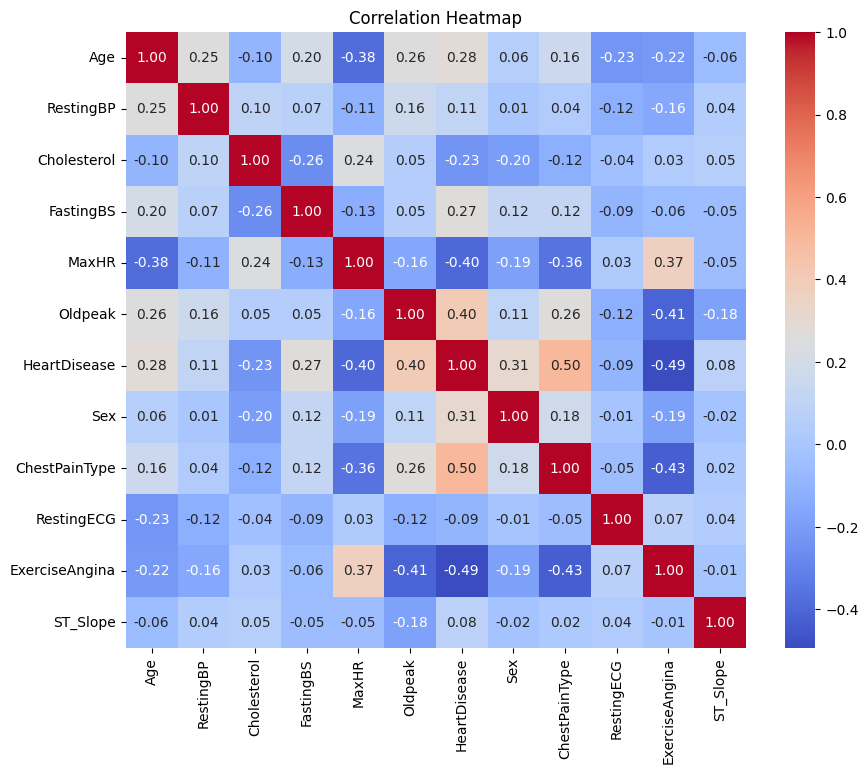

In [24]:
plot_correlation_heatmap(df = df_combined)


## Correlation Heatmap Insights

### Strongest correlations with `HeartDisease` (target):

- **ChestPainType (0.50)**  
  Strongest positive correlation. Certain chest pain types are closely associated with heart disease presence.

- **Oldpeak (0.40)**  
  Moderate positive correlation. Higher ST depression values correlate with higher heart disease risk.

- **ExerciseAngina (0.49)**  
  Positive correlation. Patients with exercise-induced angina are more likely to have heart disease.

- **MaxHR (-0.40)**  
  Moderate negative correlation. Lower maximum heart rates tend to be associated with heart disease.

---

### Notable inter-feature correlations:

- **Oldpeak ↔ ExerciseAngina (0.41)**  
  High ST depression is often accompanied by exercise-induced angina — clinically intuitive.

- **ChestPainType ↔ HeartDisease (0.50)**  
  Clear indication that certain types of chest pain (like asymptomatic) strongly relate to disease presence.

- **MaxHR ↔ ExerciseAngina (0.37)**  
  Patients with angina tend to achieve lower max heart rates.

---

### Weak/insignificant correlations:

- **Cholesterol**, **RestingBP**, and **RestingECG** show low correlation with `HeartDisease` (< 0.12), suggesting limited standalone predictive power.

- **Sex** shows mild positive correlation (0.31) — could imply gender differences in disease presence, but not decisive.


In [25]:
df_combined.to_csv('../data/processed/heart_encoded.csv', index=False)